# Прогнозирование вероятности оттока пользователей для сети фитнес-центров

**Описание проекта:** 
    
Необходимо проанализировать данные сети фитнес-центров "Культурист-датасайентист" и разработать стратегию взаимодействия с клиентами на основе аналитических данных.

**Цели проекта:**
    
1) Провести анализ данных и подготовить план действий по удержанию клиентов.
 

**Задачи проекта:**

   - спрогнозировать вероятность оттока для каждого клиента,
   - сформировать типичные портреты клиентов, выделить несколько наиболее ярких групп и охарактеризовать их основные свойства,
   - проанализировать основные признаки, наиболее сильно влияющие на отток,
   - разработать рекомендации по повышению качества работы с клиентами.

**План (декомпозиция) анализа данных:**

1) Загрузить данные

2) Провести исследовательский анализ данных

3) Построить модель прогнозирования оттока клиентов

4) Провести кластеризацию клиентов и для каждого полученного кластера посчитать долю 

5) Сформулировать выводы и предложить базовые рекомендации по работе с клиентами.

## Загрузка данных

In [1]:
#загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools

In [2]:
#загрузка данных в переменную
data = pd.read_csv('/datasets/gym_churn.csv')

## Исследовательский анализ данных (EDA)

In [3]:
#вывод информации о датафрейме на экран
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
#просмотр первых пяти строк
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
#подсчет пропущенных значений
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
#вывод основных статистических показателей
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [7]:
#вывод на экран средних значений признаков в разбивке по двум группам: тех, кто ушел, и тех, кто остался.
display(data.groupby('Churn').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [8]:
#выделим в отдельную переменную данные по группе тех, кто ушел
data_churn = data.loc[data['Churn'] == 1]
#выделим в отдельную переменную данные по группе тех, кто остался
data_not_churn = data.loc[data['Churn'] == 0]


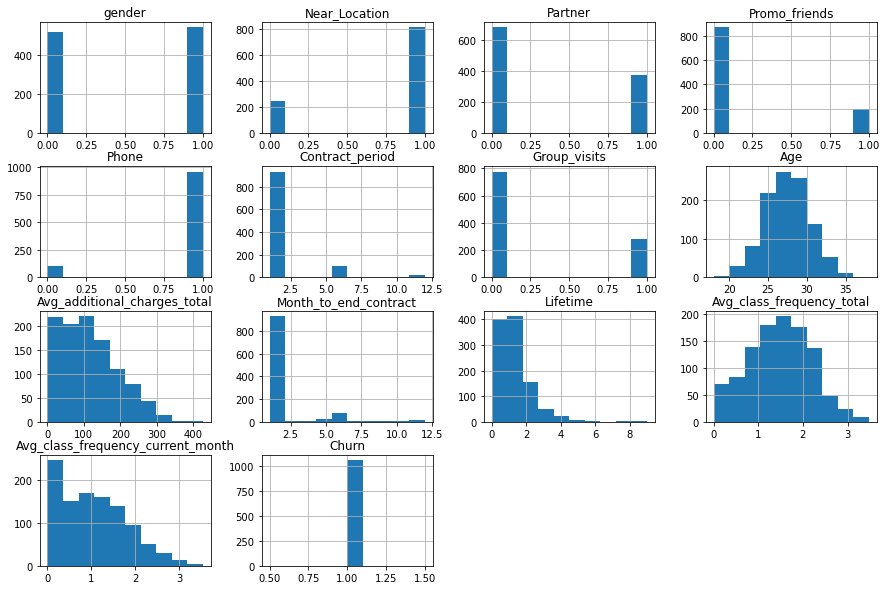

In [9]:
#строим столбчатые гистограммы признаков для тех, кто ушел
data_churn.hist(figsize=(15, 10));

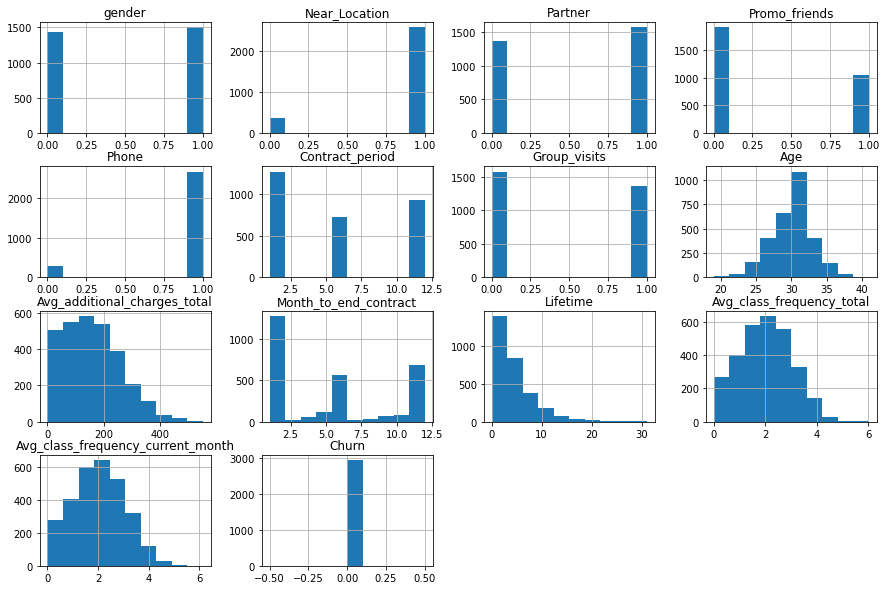

In [10]:
#строим столбчатые гистограммы признаков для тех, кто остался
data_not_churn.hist(figsize=(15, 10));

**Выводы по графикам:**
    
  Распределение признаков по группам отражает следующую картину:
  
     В группе тех, кто ушел в отток, количество мужчин и женщин примерно одинаковое, клиенты чаще проживают или работают в районе, где находится фитнес-центр, клиенты реже используют промокод "Приведи друга", и реже являются сотрудниками компаний партнеров клуба, реже посещают групповые занятия. Длительность текущего абонемента обычно один месяц. Возраст клиентов чаще всего около 27 лет. Траты на доп.услуги центра составляют у таких клиентов от 0 до 100 руб. Частота посещений в неделю с начала действия абонемента примерно 1.5 (т.е. в основном 1 раз в неделю, иногда 2 раза) Ну и ожидаемо, частота посещения в неделю за предыдущий месяц - близится к нулю, и не имеет нормального распределения.
     
     В группе тех, кто остался, также количество мужчин и женщин примерно одинаково, клиенты чаще проживают или работают в районе, где находится фитнес-центр, клиенты реже используют промокод "Приведи друга", реже посещают групповые занятия, однако примерно в 50% случаев являются сотрудниками компаний партнеров клуба. Длительность текущего абонемента обычно примерно 1 месяц.  Возраст большинства клиентов примерно 32 года. Суммарная выручка от других услуг фитнес-центра около 580 руб. Средняя частота посещений с начала действия абонемента примерно 2 раза в неделю, и за предыдущий месяц тоже 2 раза в неделю, то есть клиенты стабильно посещают фитнес-клуб.   
    

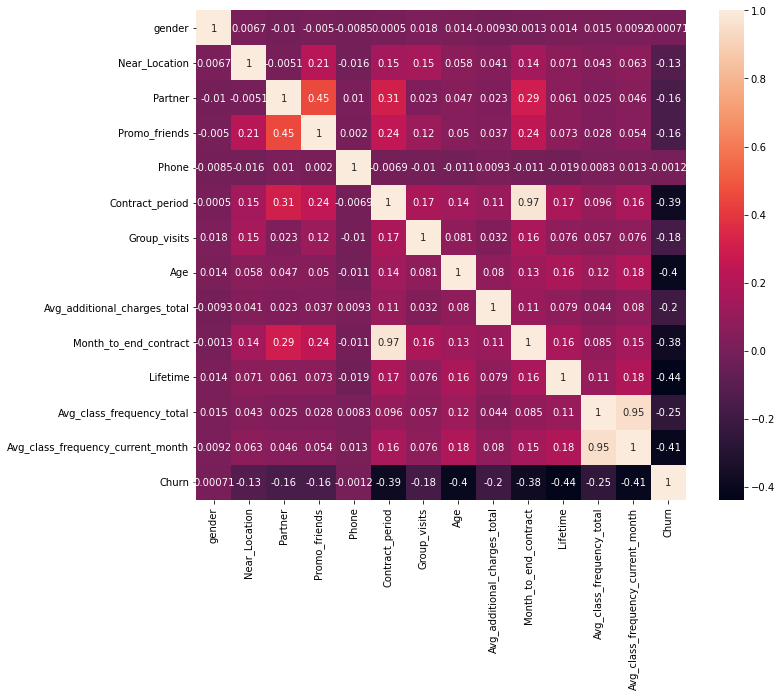

In [11]:
#построим и отрисуем матрицу корреляций
cm = data.corr()#вычисляем матрицу корреляций
#нарисуем тепловую карту с подписями для матрицы корреляций 
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, square=True)
plt.show();

**Выводы по матрице корреляций:**
    
    Анализ матрицы корреляций показывает, что существует слабая отрицательная корреляция между целевой переменной "Факт оттока" и такими признаками, как средняя частота посещений в неделю за предыдущий месяц, лайфтаймом, срок до окончания текущего действующего абонемента, возраст, длительность текущего абонемента. То есть, чем выше факт оттока, тем меньше эти признаки. Но корреляция слабая, поэтому можно сказать, что сильной зависимости целевой переменной от этих признаков нет.
    
    Также существует сильная взаимная корреляция между признаком Длительность текущего контракта и признаком Месяц до окончания контракта, а также между признаком Средняя частота посещений в неделю за все время с начала действия абонемента и признаком Средняя частота посещений в  неделю за предыдущий месяц. Скорее всего, эти признаки мультиколлинеарны.

**Выводы по п.2:**

Исследовательский анализ данных показал:

1) пропущенные значения в данных отсутствуют

2) категориальные признаки уже переведены в числовой формат и не требуют преобразования

3) анализ среднего и стандартных отклонений не показывает сильного разброса данных в датасете

4) анализ средних значений в двух группах показал следующие результаты:

    - в обеих группах примерно одинаковое соотношение мужчин и женщин;
     
    - подавляющее большинство клиентов в обеих группах указывают контактный телефон;
     
    - Группа тех, кто остался, в среднем характеризуется большей долей клиентов, которые проживают или работают в районе, где находится фитнес-центр, в ней больше клиентов - сотрудников компании партнера клуба, эти клиенты чаще использовали промо код от знакомого, чаще посещают групповые занятия, больше тратят на другие услуги фитнес-центра (кафе, спорттовары, косметический и массажный салон), по сравнению с группой тех, кто ушел в отток.
     
    - средняя длительность текущего действующего абонемента у тех, кто остался, составляет примерно 6 месяцев, в то время как в группе тех, кто ушел, длительность абонемента 1-2 месяца.
     
 5)  Анализ столбчатых диаграмм и распределения числовых признаков показывает, что числовые признаки имеют нормальное распределение в группе тех, кто остался. А вот в группе тех, кто ушел в отток, средняя частота посещений в неделю за предыдущий месяц, не имеет нормального распределения, то есть такие клиенты посещали фитнес-центр даже не каждую неделю.
 
 
 6) Распределение признаков по группам отражает следующую картину:

 В группе тех, кто ушел в отток, количество мужчин и женщин примерно одинаковое, клиенты чаще проживают или работают в районе, где находится фитнес-центр, клиенты реже используют промокод "Приведи друга", и реже являются сотрудниками компаний партнеров клуба, реже посещают групповые занятия. Длительность текущего абонемента обычно один месяц. Возраст клиентов чаще всего около 27 лет. Траты на доп.услуги центра составляют у таких клиентов от 0 до 100 руб. Частота посещений в неделю с начала действия абонемента примерно 1.5 (т.е. в основном 1 раз в неделю, иногда 2 раза) Ну и ожидаемо, частота посещения в неделю за предыдущий месяц - близится к нулю, и не имеет нормального распределения.

 В группе тех, кто остался, также количество мужчин и женщин примерно одинаково, клиенты чаще проживают или работают в районе, где находится фитнес-центр, клиенты реже используют промокод "Приведи друга", реже посещают групповые занятия, однако примерно в 50% случаев являются сотрудниками компаний партнеров клуба. Длительность текущего абонемента обычно примерно 1 месяц.  Возраст большинства клиентов примерно 32 года. Суммарная выручка от других услуг фитнес-центра около 580 руб. Средняя частота посещений с начала действия абонемента примерно 2 раза в неделю, и за предыдущий месяц тоже 2 раза в неделю, то есть клиенты стабильно посещают фитнес-клуб.
 
 7) Анализ матрицы корреляций показывает, что существует слабая отрицательная корреляция между целевой переменной "Факт оттока" и такими признаками, как средняя частота посещений в неделю за предыдущий месяц, лайфтаймом, срок до окончания текущего действующего абонемента, возраст, длительность текущего абонемента. То есть, чем выше факт оттока, тем меньше эти признаки. Но корреляция слабая, поэтому можно сказать, что сильной зависимости целевой переменной от этих признаков нет.
    
   Также существует сильная взаимная корреляция между признаком Длительность текущего контракта и признаком Месяц до окончания контракта, а также между признаком Средняя частота посещений в неделю за все время с начала действия абонемента и признаком Средняя частота посещений в  неделю за предыдущий месяц. Скорее всего, эти признаки мультиколлинеарны.  

## Построение модели прогнозирования оттока клиентов

In [12]:
#выведем на экран размеры данных в разбивке по группам
print('Размер файла с оттоком:', data_churn.shape)
print('Размер файла оставшихся клиентов:', data_not_churn.shape)

Размер файла с оттоком: (1061, 14)
Размер файла оставшихся клиентов: (2939, 14)


In [13]:
#создадим функцию, которая будет выводить метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1_score: {:.2f}'.format(f1_score(y_true, y_pred)))
              
# разделили данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# разделили модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
# обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train)

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)   

In [14]:
## задаем алгоритм для новой модели на основе модели Логистической регрессии
lr_model = LogisticRegression(random_state=0, solver='liblinear')

#обучаем модель 
lr_model.fit(X_train_st, y_train)

#воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

#выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities, title = 'Метрики для модели логистической регрессии')     

Метрики для модели логистической регрессии
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1_score: 0.84


In [15]:
#зададим алгоритм для новой модели на основе модели алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

#обучаем модель
rf_model.fit(X_train_st, y_train)

#воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)

#выведем все метрики
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса')

Метрики для модели случайного леса
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1_score: 0.83


**Выводы по п.3:**
    
   Анализ моделей по метрике Доля правильных ответов(Accuracy) показывает по обеим моделям долю правильных ответов выше    90%, но тут следует учитывать, что размер целевых классов примерно 1 к трем, то есть клиентов с оттоком в три раза меньше, чем оставшихся клиентов, поэтому лучше оценить качество модели другими метриками.
    
   Однако при сравнении моделей по метрике Точность (precision), а также по метрике Полнота(Recall) и соотношению между ними (F1_score) можно сделать вывод, что модель логистической регрессии показала себя лучше на основании метрик, так как все показатели у этой модели выше, чем у модели случайного леса. Но следует отметить, что по результатам расчета метрик модель случайного леса тоже не плоха, все показатели тоже выше 0,8.

## Кластеризация клиентов

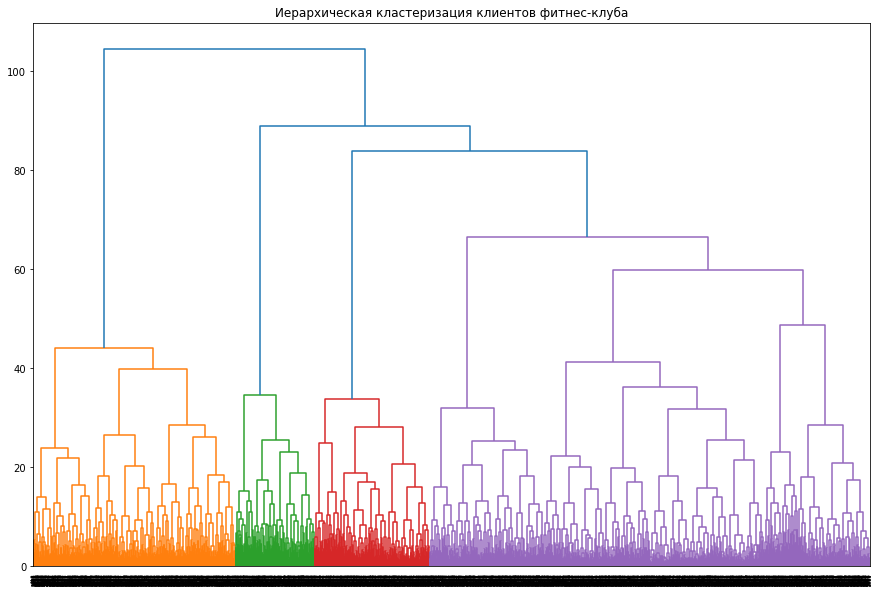

In [16]:
#уберем столбец с оттоком
data_drop = data.drop('Churn', axis=1)

# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(data_drop)

#создаем таблицу "связок" между объектами
linked = linkage(X_sc, method='ward')

#визуализируем дендрограмму
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов фитнес-клуба')
plt.show()

**Выводы по дендрограмме:**
    
    На основании полученной дендрограммы можно выделить 4 кластера. 
    

In [17]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)

# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
data['cluster_km'] = labels
#data_drop['cluster_km'] = labels

In [18]:
# выводим статистику по средним значениям наших признаков по кластеру
display(data.groupby('cluster_km').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


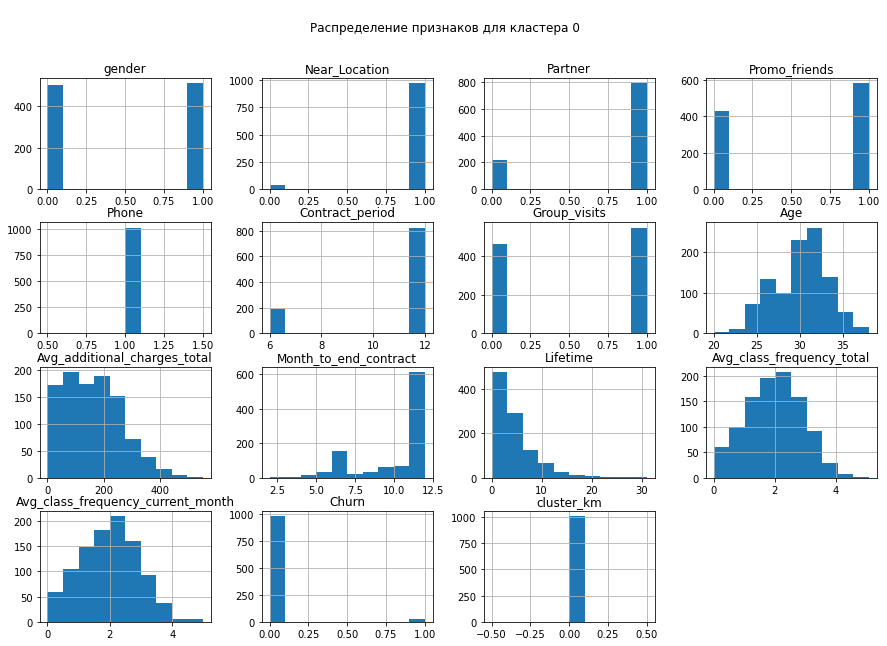

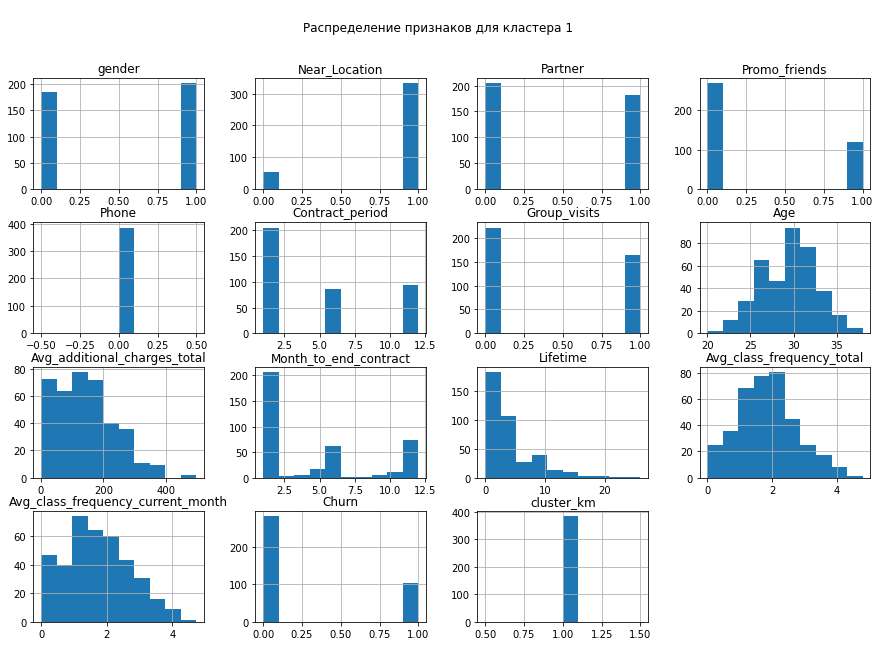

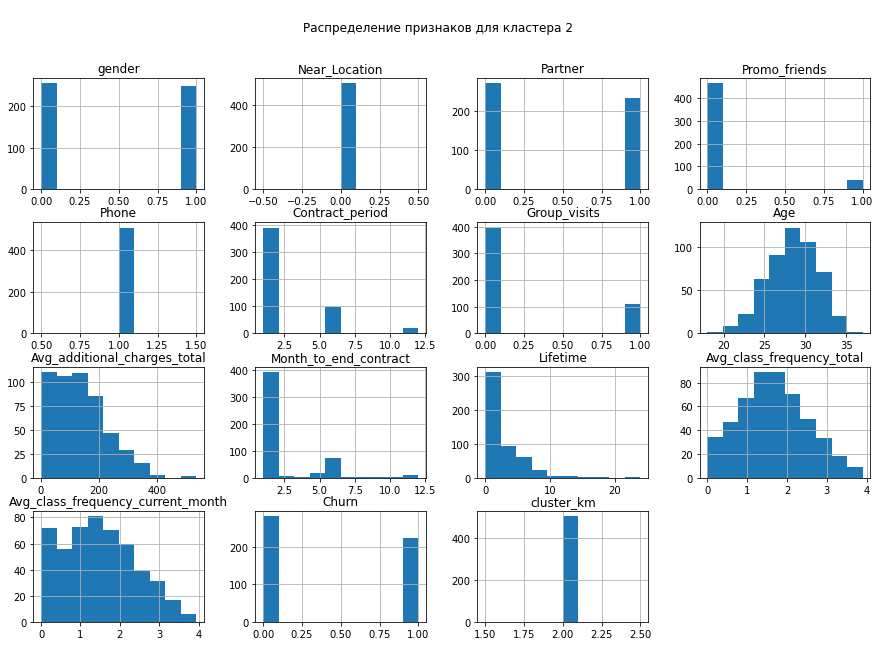

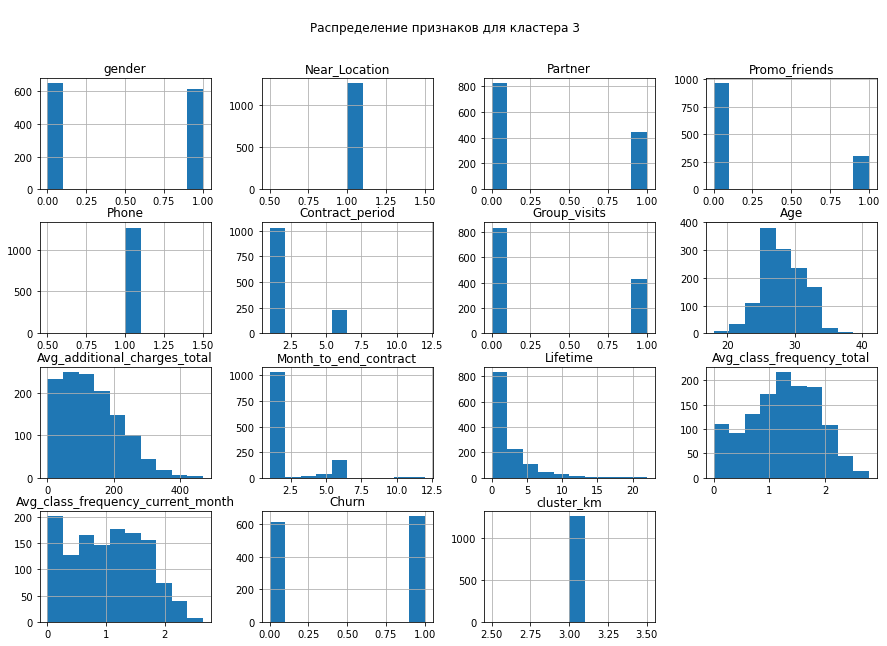

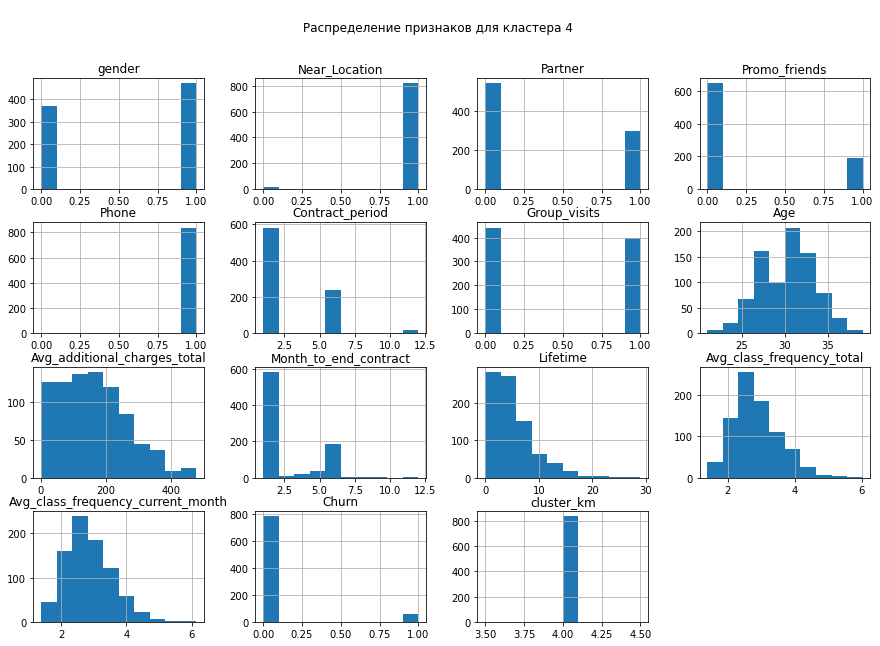

In [19]:
#построим распределения признаков для кластеров
for value in [0, 1, 2, 3, 4]:
    data[data['cluster_km'] == value].hist(figsize=(15,10))
    plt.suptitle('\nРаспределение признаков для кластера {}'.format(value))
    plt.show()

**Выводы по средним значениям и распределениям признаков кластеров:**
    
    На основании средних значений признаков и распределения признаков можно сделать следующие выводы:

**Кластер 0**

- Отток - 3% - самый низкий % оттока клиентов

- клиенты живут или работают недалеко от фитнес-центра

- 78% всех клиентов являются сотрудниками компаний-партнеров клуба

- 57% всех клиентов участвовали в акции Приведи друга

- самая большая длительность абонемента - примерно 12 месяцев

 - 54% всех клиентов посещают групповые занятия
 
 - частота посещений в неделю с начала действия абонемента и за предыдущий месяц стабильна и составляет примерно 2 раза в неделю
 
 
**Кластер 1**

- Отток - 27%

- 86% клиентов живут или работают недалеко от фитнес-центра

 - не предоставляют номер телефона
 
 - длительность текущего контракта примерно 5 месяцев

**Кластер 2**


- Отток - 44% 

- все клиенты живут и работают в другом районе, не рядом с фитнес-центром

 - реже всего посещают групповые занятия
 
 - в этом кластере всего 8% клиентов, которые использовали акцию Приведи друга

**Кластер 3**

- Отток - 52% - самый высокий

- все клиенты живут или работают недалеко от фитнес-центра

- наименьшее количество посещений с начала действия абонемента и за предыдущий месяц

**Кластер 4**

- Отток - 7%

- живут или работают недалеко от фитнес-центра

- чаще всех посещают фитнес-клуб



**Выводы по п.4:**
    
    На основании полученной дендрограммы можно выделить 4 кластера. В рамках технического задания следовало выделить 5 кластеров. На основании полученного разделения на 5 кластеров получили следующие группы:
       
   **Кластер 0**

- Отток - 3% - самый низкий % оттока клиентов

- клиенты живут или работают недалеко от фитнес-центра

- 78% всех клиентов являются сотрудниками компаний-партнеров клуба

- 57% всех клиентов участвовали в акции Приведи друга

- самая большая длительность абонемента - примерно 12 месяцев

 - 54% всех клиентов посещают групповые занятия
 
 - частота посещений в неделю с начала действия абонемента и за предыдущий месяц стабильна и составляет примерно 2 раза в неделю
 
 
**Кластер 1**

- Отток - 27%

- 86% клиентов живут или работают недалеко от фитнес-центра

 - не предоставляют номер телефона
 
 - длительность текущего контракта примерно 5 месяцев

**Кластер 2**


- Отток - 44% 

- все клиенты живут и работают в другом районе, не рядом с фитнес-центром

 - реже всего посещают групповые занятия
 
 - в этом кластере всего 8% клиентов, которые использовали акцию Приведи друга

**Кластер 3**

- Отток - 52% - самый высокий

- все клиенты живут или работают недалеко от фитнес-центра

- наименьшее количество посещений с начала действия абонемента и за предыдущий месяц

**Кластер 4**

- Отток - 7%

- живут или работают недалеко от фитнес-центра

- чаще всех посещают фитнес-клуб

В итоге получается, что кластеры 2 и 3 наиболее склонны к оттоку, а кластеры 0 и 4 самые надежные.


## Выводы и базовые рекомендации по работе с клиентами

**Общий вывод по проекту:**

1)  анализ среднего и стандартных отклонений не показывает сильного разброса данных в датасете

2)  анализ средних значений в двух группах показал следующие результаты:

 -  в обеих группах примерно одинаковое соотношение мужчин и женщин;

 - подавляющее большинство клиентов в обеих группах указывают контактный телефон;

 - Группа тех, кто остался, в среднем характеризуется большей долей клиентов, которые проживают или работают в районе, где находится фитнес-центр, в ней больше клиентов - сотрудников компании партнера клуба, эти клиенты чаще использовали промо код от знакомого, чаще посещают групповые занятия, больше тратят на другие услуги фитнес-центра (кафе, спорттовары, косметический и массажный салон), по сравнению с группой тех, кто ушел в отток.

 - средняя длительность текущего действующего абонемента у тех, кто остался, составляет примерно 6 месяцев, в то время как в группе тех, кто ушел, длительность абонемента 1-2 месяца.
 
3) Анализ столбчатых диаграмм и распределения числовых признаков показывает, что числовые признаки имеют нормальное распределение в группе тех, кто остался. А вот в группе тех, кто ушел в отток, средняя частота посещений в неделю за предыдущий месяц, не имеет нормального распределения, то есть такие клиенты посещали фитнес-центр даже не каждую неделю.

4) Распределение признаков по группам отражает следующую картину:

В группе тех, кто ушел в отток, количество мужчин и женщин примерно одинаковое, клиенты чаще проживают или работают в районе, где находится фитнес-центр, клиенты реже используют промокод "Приведи друга", и реже являются сотрудниками компаний партнеров клуба, реже посещают групповые занятия. Длительность текущего абонемента обычно один месяц. Возраст клиентов чаще всего около 27 лет. Траты на доп.услуги центра составляют у таких клиентов от 0 до 100 руб. Частота посещений в неделю с начала действия абонемента примерно 1.5 (т.е. в основном 1 раз в неделю, иногда 2 раза) Ну и ожидаемо, частота посещения в неделю за предыдущий месяц - близится к нулю, и не имеет нормального распределения.

В группе тех, кто остался, также количество мужчин и женщин примерно одинаково, клиенты чаще проживают или работают в районе, где находится фитнес-центр, клиенты реже используют промокод "Приведи друга", реже посещают групповые занятия, однако примерно в 50% случаев являются сотрудниками компаний партнеров клуба. Длительность текущего абонемента обычно примерно 1 месяц. Возраст большинства клиентов примерно 32 года. Суммарная выручка от других услуг фитнес-центра около 580 руб. Средняя частота посещений с начала действия абонемента примерно 2 раза в неделю, и за предыдущий месяц тоже 2 раза в неделю, то есть клиенты стабильно посещают фитнес-клуб.

5) Анализ матрицы корреляций показывает, что нет сильной зависимости целевой переменной ни от одного из признаков. 

6)Анализ моделей показал, что модель логистической регрессии показала себя лучше на основании метрик, так как все показатели у этой модели выше, чем у модели случайного леса. 
    
   7) На основании полученной дендрограммы можно выделить 4 кластера. 
   
   8) На основании полученного разделения на 5 кластеров получили следующие группы:
   
**Кластер 0**

Отток - 3% - самый низкий % оттока клиентов

клиенты живут или работают недалеко от фитнес-центра

78% всех клиентов являются сотрудниками компаний-партнеров клуба

57% всех клиентов участвовали в акции Приведи друга

самая большая длительность абонемента - примерно 12 месяцев

54% всех клиентов посещают групповые занятия

частота посещений в неделю с начала действия абонемента и за предыдущий месяц стабильна и составляет примерно 2 раза в неделю

**Кластер 1**

Отток - 27%

86% клиентов живут или работают недалеко от фитнес-центра

не предоставляют номер телефона

длительность текущего контракта примерно 5 месяцев

**Кластер 2**

Отток - 44%

все клиенты живут и работают в другом районе, не рядом с фитнес-центром

реже всего посещают групповые занятия

в этом кластере всего 8% клиентов, которые использовали акцию Приведи друга

**Кластер 3**

Отток - 52% - самый высокий

все клиенты живут или работают недалеко от фитнес-центра

наименьшее количество посещений с начала действия абонемента и за предыдущий месяц

**Кластер 4**

Отток - 7%

живут или работают недалеко от фитнес-центра

чаще всех посещают фитнес-клуб

**В итоге получается, что кластеры 2 и 3 наиболее склонны к оттоку, а кластеры 0 и 4 самые надежные.**


**Рекомендации по работе с клиентами:**
    
   - менеджерам фитнес-клуба расширять продажу долгосрочных абонементов, так как по ним отток ниже, в том числе предлагать переоформить уже имеющиеся краткосрочные абонементы на долгосрочные со скидкой
   - ввести дополнительные способы повышения лояльности клиентов (бесплатный чай, кофе; бесплатные марафоны, праздники; бесплатные средства гигиены).
   - клиентам, которые начали пропадать (то есть реже появляться в фитнес-клубе), рассылать sms и E-mail рассылки с напоминаниями о фитнес-клубе и занятиях в нем в позитивном ключе.